## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [5]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('motorbike_ambulance_calls.csv')

In [7]:
# 3. Виведення основної статистичної інформації по числовим змінним
numeric_stats = df.describe()
print("Основна статистична інформація по числовим змінним:")
print(numeric_stats)

# 4. Виведення максимальних та мінімальних значень по всім змінним
print("\nМаксимальні значення по всім змінним:")
print(df.max())
print("\nМінімальні значення по всім змінним:")
print(df.min())

# 5. Виведення розмірності датасету
print("\nРозмірність датасету:")
print(df.shape)

Основна статистична інформація по числовим змінним:
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.0057

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [8]:
# Перевірка типів даних
print("Типи даних кожної змінної:")
print(df.dtypes)

# Перевірка кількості даних по кожній змінній
print("\nКількість даних по кожній змінній:")
print(df.count())


Типи даних кожної змінної:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Кількість даних по кожній змінній:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [9]:
# Перевірка наявності пропусків
missing_values = df.isnull().sum()
print("Кількість пропущених значень по кожній змінній:")
print(missing_values)


Кількість пропущених значень по кожній змінній:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

Завантаження даних: Дані були успішно завантажені з файлу "motorbike_ambulance_calls.csv" за допомогою бібліотеки Pandas і збережені в об'єкт DataFrame під назвою df.

Підключення необхідних бібліотек: Для обробки та аналізу даних були підключені бібліотеки Pandas та NumPy.

Основна статистична інформація: Ми вивели основну статистичну інформацію (середнє значення, стандартне відхилення, мінімум, максимум та квартилі) для числових змінних у датасеті.

Максимальні та мінімальні значення: Були виведені максимальні та мінімальні значення для кожної змінної у датасеті.

Розмірність датасету: Ми вивели розмірність датасету, щоб дізнатися, скільки рядків та стовпців у ньому.

Типи даних та кількість даних: Ми перевірили типи даних для кожної змінної у датасеті та підрахували кількість даних, які маються для кожної змінної.

Перевірка наявності пропусків: Була здійснена перевірка кожної змінної на наявність пропущених значень, яка допомогла ідентифікувати, чи є пропуски в даних.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [13]:


def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

df = transform_date(df, 'date')


In [14]:


def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(df, 'date')


First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


Функція get_time_limits була успішно реалізована для визначення часових меж у датасеті.

Ми скористалися методами min() та max() для стовпця дати, щоб знайти першу та останню дату в датасеті.
Після цього ми вивели отримані значення, що представляють першу та останню дати датасету.
Ці висновки допомагають нам зрозуміти, які дані ми маємо у датасеті та який період часу вони охоплюють.






#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [16]:
import pandas as pd

def separate_categorical_variables(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    data_categorical = df[categorical_columns].copy()
    return data_categorical

data_categorical = separate_categorical_variables(df)


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [18]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {'spring': 0, 'summer': 1, 'fall': 2, 'winter': 3}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(df, 'season')


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

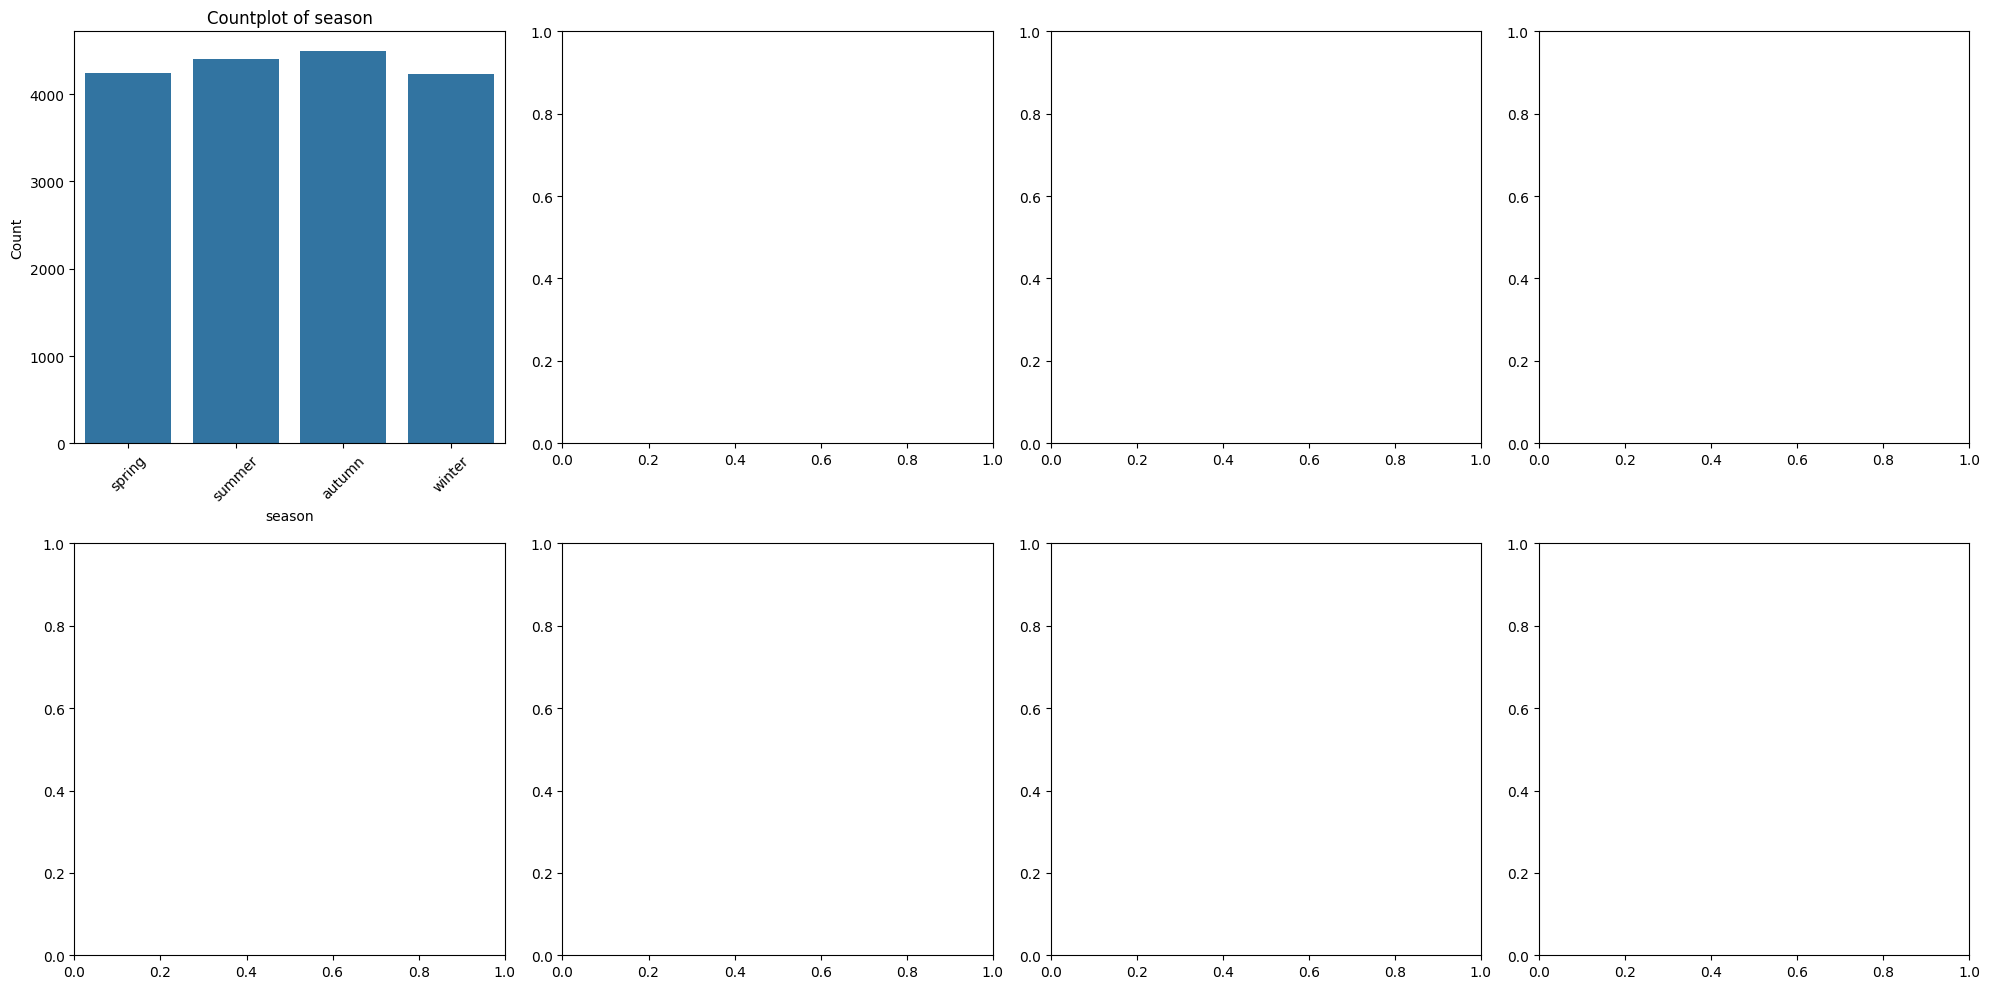

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(data=data_categorical, x=variable, ax=subplot)
    subplot.set_title(f'Countplot of {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Count')
    subplot.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Висновки з 5-7 завдання (детальні)**

У завданні 5 ми виділили всі категоріальні змінні у окремий датасет `data_categorical`. Це дозволяє нам окремо працювати з цими змінними та аналізувати їх властивості.

У завданні 6 ми перетворили змінну `season` в числову шкалу. Це може спростити аналіз і дозволить використовувати її у моделюванні.

У завданні 7 ми побудували графіки `countplot` для всіх категоріальних змінних. Ці графіки дозволяють нам візуалізувати розподіл категоріальних змінних та отримати загальне уявлення про їхній характер. Вони можуть бути корисними при аналізі даних та прийнятті рішень щодо подальшого моделювання або обробки даних.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [20]:
data_numerical = df.select_dtypes(include=['int64', 'float64'])

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

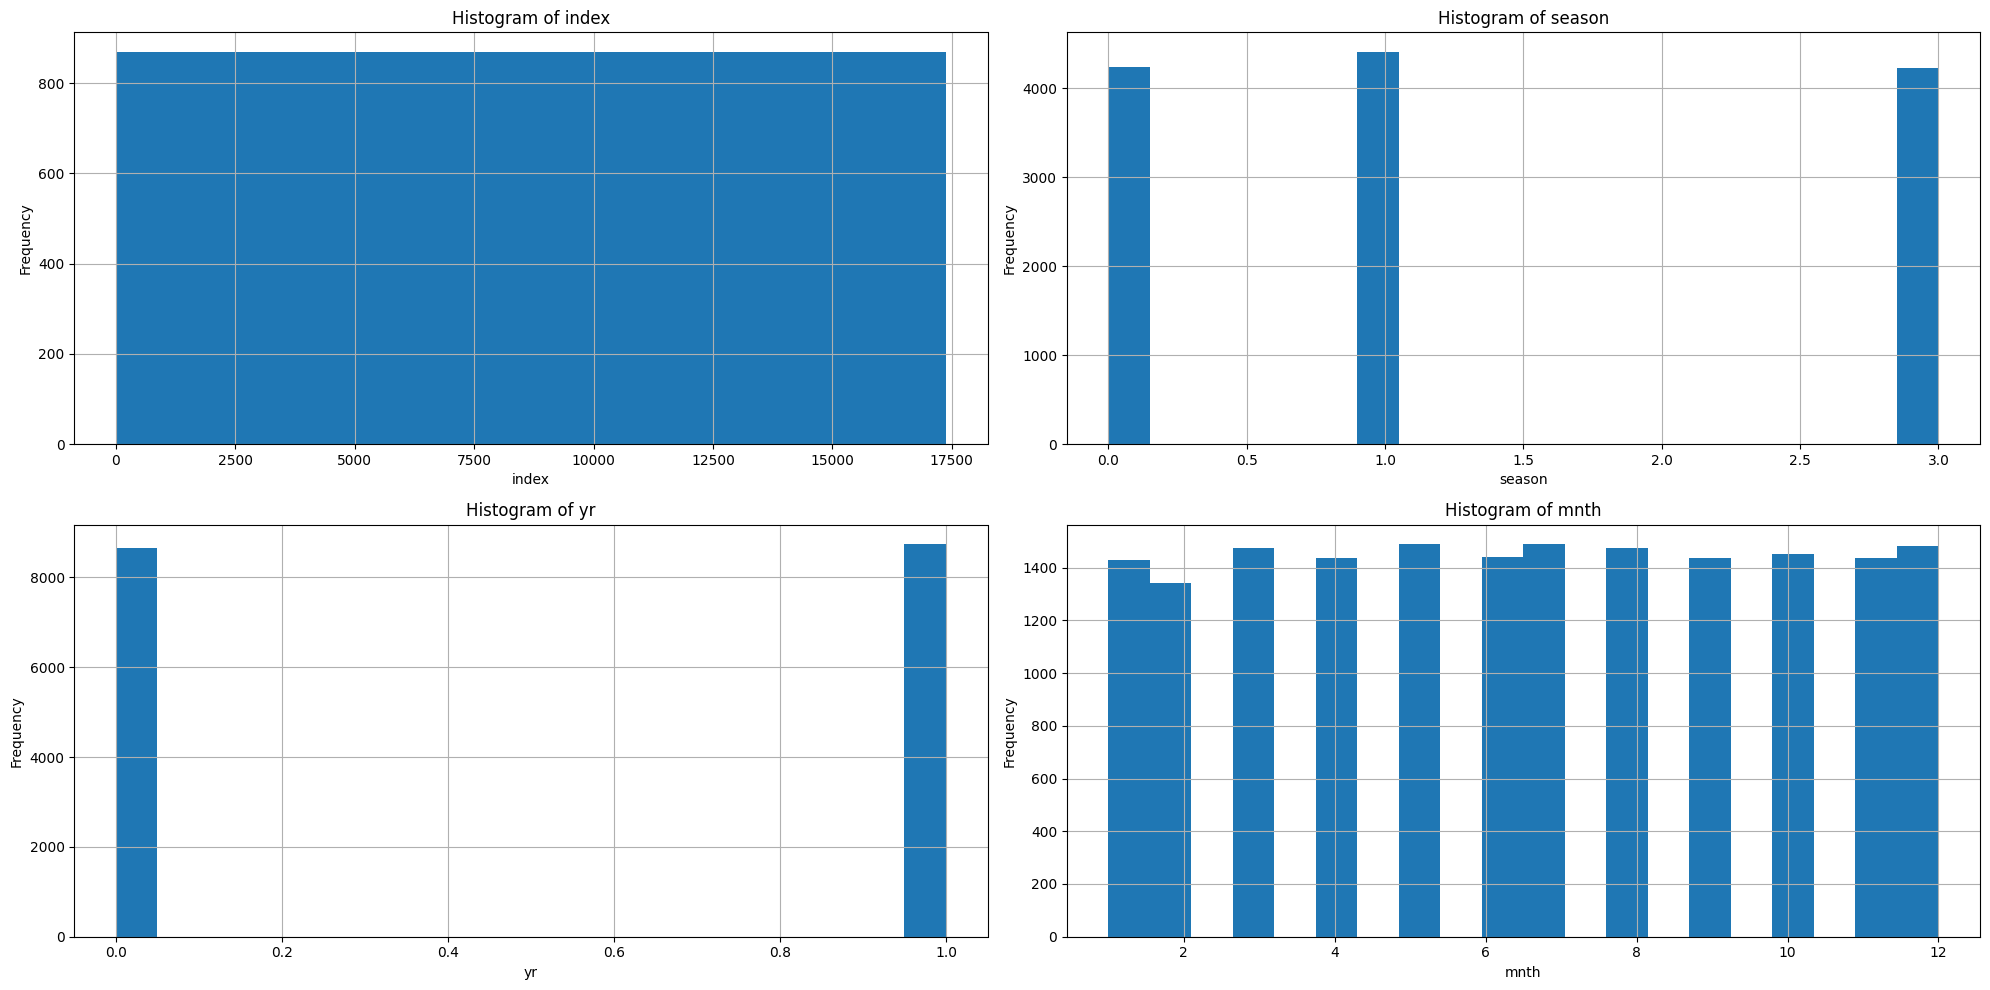

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for variable, subplot in zip(data_numerical.columns, ax.flatten()):
    data_numerical[variable].hist(ax=subplot, bins=20)
    subplot.set_title(f'Histogram of {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

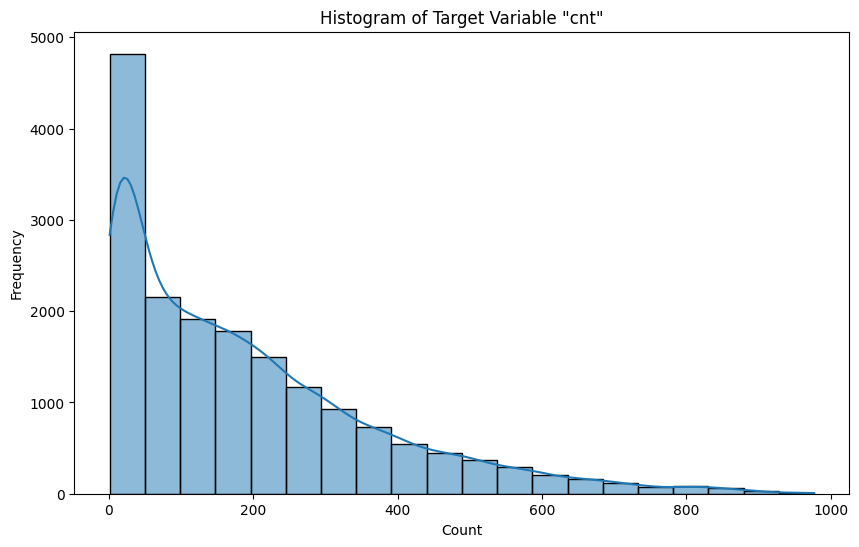

Skewness of target variable 'cnt': 1.2774116037490577


In [22]:
# Побудова гістограми розподілу цільової змінної
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cnt', bins=20, kde=True)
plt.title('Histogram of Target Variable "cnt"')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

# Розрахунок коефіцієнта нахилу
skewness = df['cnt'].skew()
print("Skewness of target variable 'cnt':", skewness)


**Висновки з 8-10 завдання (детальні)**

Завдання 8:

Ми виділили числові змінні у окремий датасет за допомогою методу select_dtypes з бібліотеки pandas.
Цей датасет містить лише числові змінні, що дозволяє нам зосередитися на їх аналізі.

Завдання 9:

Ми побудували гістограми розподілу для кожної числової змінної.
Гістограми дозволяють нам візуалізувати розподіл кожної змінної та отримати загальне уявлення про їхню форму та спотворення.

Завдання 10:

Ми побудували гістограму розподілу цільової змінної "cnt".
Значення коефіцієнта нахилу допомагає нам зрозуміти ступінь асиметрії розподілу цільової змінної.
За допомогою цього коефіцієнта ми можемо визначити, чи потрібно застосовувати перетворення до цільової змінної для поліпшення моделі.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

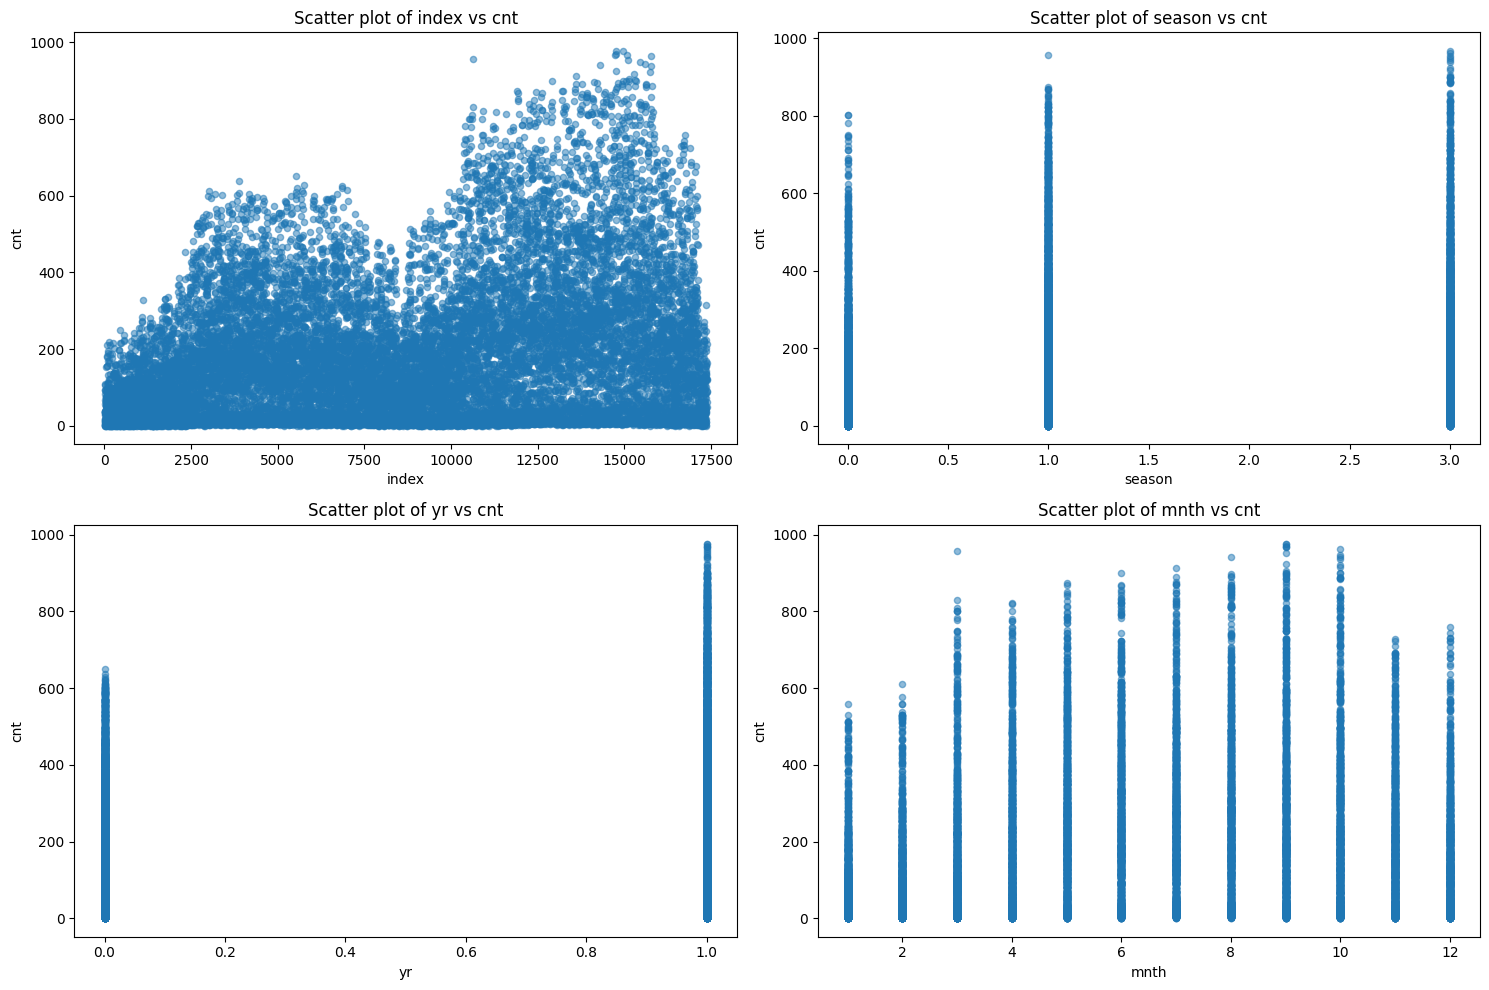

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    data_numerical.plot(kind='scatter', x=var, y='cnt', ax=subplot, alpha=0.5)
    subplot.set_title(f'Scatter plot of {var} vs cnt')

plt.tight_layout()
plt.show()


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

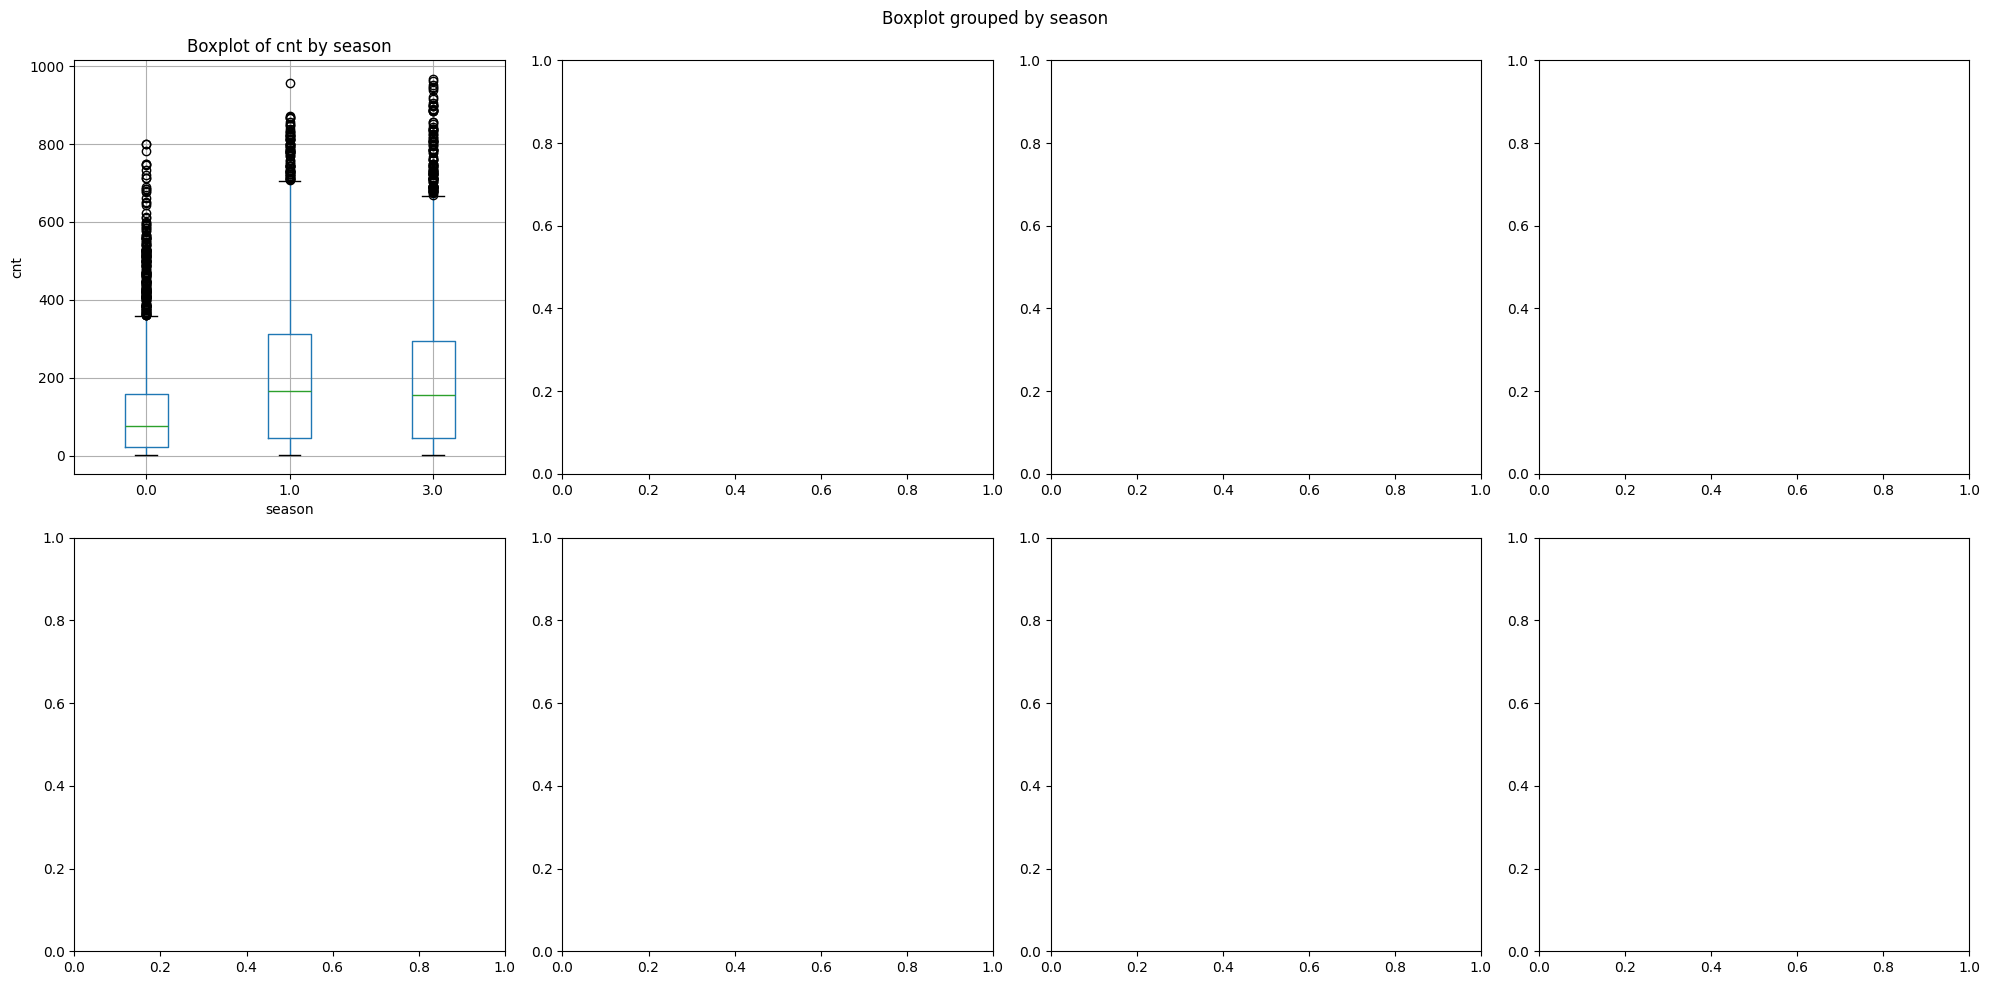

In [24]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    data.boxplot(column='cnt', by=var, ax=subplot)
    subplot.set_title(f'Boxplot of cnt by {var}')
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**

Завдання 11 (Scatterplot):

Для кожної пари числових змінних та цільової змінної cnt ми побудували графік розсіювання.
Ці графіки допомагають візуалізувати взаємозв'язок між числовими змінними та цільовою змінною.
За допомогою цих графіків можна оцінити наявність лінійних та нелинійних залежностей між змінними.

Завдання 12 (Boxplot):

Ми побудували boxplot для кожної категоріальної змінної відносно цільової змінної cnt.
Ці графіки дозволяють нам оцінити, як змінюється розподіл цільової змінної в залежності від категоріальної змінної.
Boxplot допомагає виявити наявність викидів та розподіл значень cnt в кожній категорії.

**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

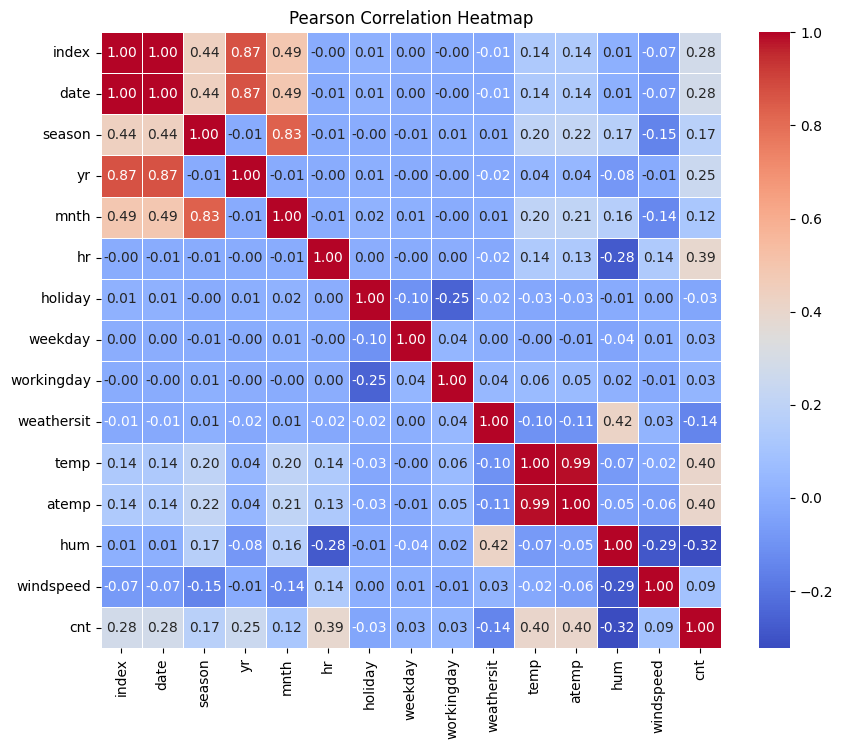

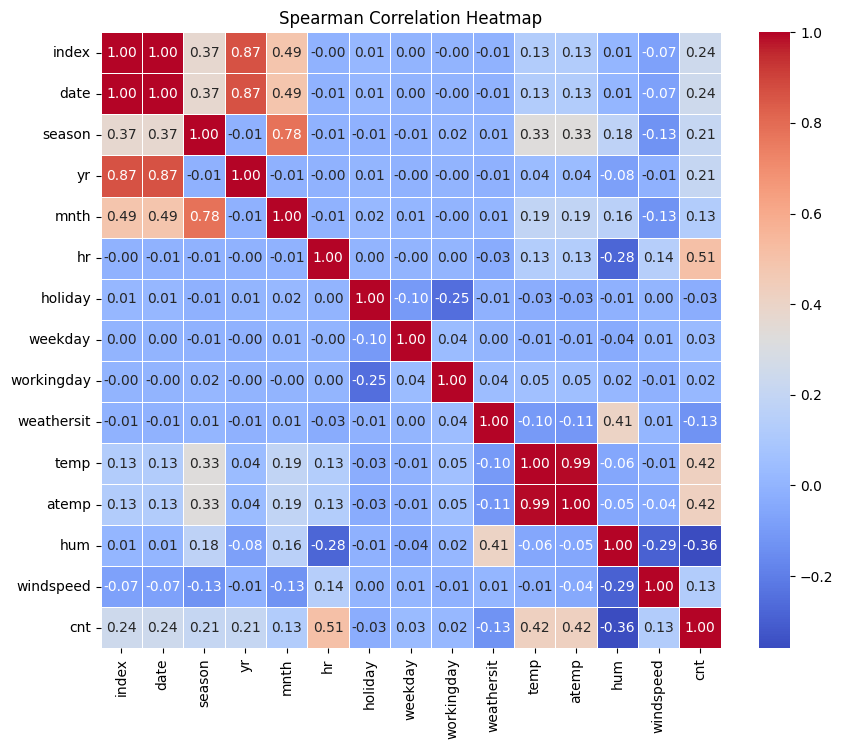

In [25]:
correlation_pearson = data.corr(method='pearson')


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

correlation_spearman = data.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()



Метод Пірсона: Цей метод оцінює лінійну залежність між парами змінних. Значення кореляційного коефіцієнта варіюється від -1 до 1. Значення близьке до 1 вказує на сильну позитивну кореляцію, значення близьке до -1 вказує на сильну негативну кореляцію, а значення близьке до 0 вказує на відсутність кореляції.

Метод Спірмана: Цей метод оцінює монотонну залежність між парами змінних, тобто він може виявити не тільки лінійні, а й нелинійні залежності. Кореляційний коефіцієнт Спірмена також варіюється від -1 до 1, але він вимірює ступінь монотонності залежності.

Відмінність методів: Головна відмінність між методами полягає в тому, що метод Пірсона оцінює тільки лінійні залежності, тоді як метод Спірмана виявляє будь-які монотонні залежності, незалежно від їх форми. Таким чином, метод Спірмана є більш універсальним для виявлення залежностей між змінними, але він менш чутливий до виявлення лінійних залежностей у порівнянні з методом Пірсона.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [26]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([
        df,
        pd.get_dummies(df['season'], prefix='season'),
        pd.get_dummies(df['mnth'], prefix='mnth'),
        pd.get_dummies(df['weekday'], prefix='weekday'),
        pd.get_dummies(df['weathersit'], prefix='weathersit')
    ], axis=1)
    
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features

features = get_dummies(data)


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [27]:
# Створення нової змінної night_hours
features['night_hours'] = ((features['hr'] >= 0) & (features['hr'] <= 5)) | (features['hr'] == 23)

# Видалення змінної hr
features = features.drop('hr', axis=1)


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [31]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

KeyError: "['spring', 'hr_0'] not found in axis"

In [28]:
from sklearn.model_selection import train_test_split

def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(columns=[target])  # Всі ознаки, крім цільової
    y = df[target]  # Цільова змінна

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    
    return X_train, X_test, y_train, y_test


In [29]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

NameError: name 'features_lr' is not defined

In [30]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

